In [400]:
# Imports
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from bs4 import BeautifulSoup 
import mplcyberpunk
#from tabulate import tabulate

In [401]:
#extract the data from the website
url = requests.get("https://www.fundsexplorer.com.br/ranking")

In [402]:
fii_bs4 = BeautifulSoup(url.text, "html.parser")

In [403]:
#find the table with a tag
fii_table = fii_bs4.findAll(attrs = {'id' : 'scroll-wrapper'})
table = fii_table[0].findAll('table')

In [404]:
fii_df = pd.read_html(str(fii_table[0]))[0]

In [405]:
#initial dataframe
fii_df

,Código do fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,Dividend Yield,DY (3M) Acumulado,DY (6M) Acumulado,DY (12M) Acumulado,DY (3M) Média,...,Patrimônio Líq.,VPA,P/VPA,DY Patrimonial,Variação Patrimonial,Rentab. Patr. no Período,Rentab. Patr. Acumulada,Vacância Física,Vacância Financeira,Quantidade Ativos
0,FIVN11,Shoppings,"R$ 3,44",908.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 72.396.365,96","R$ 7,69",45.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 16,51",1.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 448.456.317,82","R$ 10,80",153.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 8,82",2223.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.688.895,17","R$ 13,26",67.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 922,00",20.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 224.603.756,71","R$ 2.020,24",46.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 13,25",39.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -12.176.856,00","R$ -16,06",-83.0,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,EDGA11,Lajes Corporativas,"R$ 20,89",420.0,"R$ 0,13","0,62%","2,03%","3,86%","8,37%","0,68%",...,"R$ 233.668.180,11","R$ 61,30",34.0,NaN,NaN,NaN,NaN,"48,81%",NaN,1
310,CCRF11,Títulos e Val. Mob.,"R$ 85,80",465.0,"R$ 1,37","1,60%","2,73%","5,16%","12,45%","0,91%",...,"R$ 149.178.347,27","R$ 94,90",90.0,NaN,NaN,NaN,NaN,NaN,NaN,0
311,EQIR11,Títulos e Val. Mob.,"R$ 8,90",5552.0,"R$ 0,11","1,24%","3,50%","17,03%","23,83%","1,17%",...,"R$ 49.065.462,53","R$ 9,76",91.0,NaN,NaN,NaN,NaN,NaN,NaN,0
312,ERCR11,Híbrido,"R$ 76.000,00",1.0,"R$ 1.149,15","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 158.075.396,84","R$ 66.530,05",114.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [406]:
fii_df.columns.values

array(['Código do fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'Dividend Yield', 'DY (3M) Acumulado',
       'DY (6M) Acumulado', 'DY (12M) Acumulado', 'DY (3M) Média',
       'DY (6M) Média', 'DY (12M) Média', 'DY Ano', 'Variação Preço',
       'Rentab. Período', 'Rentab. Acumulada', 'Patrimônio Líq.', 'VPA',
       'P/VPA', 'DY Patrimonial', 'Variação Patrimonial',
       'Rentab. Patr. no Período', 'Rentab. Patr. Acumulada',
       'Vacância Física', 'Vacância Financeira', 'Quantidade Ativos'],
      dtype=object)

In [407]:
#rename the columns
fii_df.columns = ['ticker', 'Setor', 'price', 'liquidez',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado',
       'DY (6M)Acumulado', 'dy', 'DY (3M)Média',
       'DY (6M)Média', 'Dividenmediio', 'DY Ano', 'Variação Preço',
       'Rentab.Período', 'Rentab.Acumulada', 'PatrimônioLíq.', 'VPA',
       'pvpa', 'DYPatrimonial', 'VariaçãoPatrimonial',
       'Rentab. Patr.no Período', 'Rentab. Patr.Acumulada',
       'VacânciaFísica', 'VacânciaFinanceira', 'QuantidadeAtivos']

In [408]:
fii_df.columns.values

array(['ticker', 'Setor', 'price', 'liquidez', 'Dividendo',
       'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado', 'dy',
       'DY (3M)Média', 'DY (6M)Média', 'Dividenmediio', 'DY Ano',
       'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'pvpa', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'], dtype=object)

In [409]:
#save a backup od the data
fii_back = fii_df.copy()

In [410]:
#select the columns needed for the test
test = fii_df[['ticker', 'price', 'dy', 'pvpa','liquidez']]

In [411]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker       0
price        7
dy           5
pvpa        18
liquidez     7
dtype: int64

In [412]:
#excludes the "nan" data
test = test[test['price'].notna()]
test = test[test['dy'].notna()]

In [413]:
print("--> DATA:")
display(test.isnull().sum())

--> DATA:


ticker       0
price        0
dy           0
pvpa        11
liquidez     0
dtype: int64

In [414]:
#classified the dataframe by dividend yeld from largest to smallest 
test = test.sort_values(['dy'], ascending=False)

In [415]:
test

,ticker,price,dy,pvpa,liquidez
213,HGLG11,"R$ 161,65","9,98%",106.0,26399.0
55,BCFF11,"R$ 62,46","9,96%",83.0,33204.0
116,PLRI11,"R$ 23,10","9,95%",72.0,11.0
160,BICR11,"R$ 103,37","9,83%",104.0,4.0
305,XPIN11,"R$ 71,00","9,80%",69.0,3789.0
...,...,...,...,...,...
89,AGRX11,"R$ 10,50","0,00%",NaN,8960.0
85,CXCI11,"R$ 75,00","0,00%",83.0,470.0
82,RSPD11,"R$ 10,03","0,00%",1.0,44516.0
81,RSPD11,"R$ 10,05","0,00%",1.0,31636.0


In [416]:
# excludes the "R$" unit from the data
unit = 'R$'
test['price'] = [sub.replace(unit, "").strip() for sub in test['price']]

In [417]:
test

,ticker,price,dy,pvpa,liquidez
213,HGLG11,"161,65","9,98%",106.0,26399.0
55,BCFF11,"62,46","9,96%",83.0,33204.0
116,PLRI11,"23,10","9,95%",72.0,11.0
160,BICR11,"103,37","9,83%",104.0,4.0
305,XPIN11,"71,00","9,80%",69.0,3789.0
...,...,...,...,...,...
89,AGRX11,"10,50","0,00%",NaN,8960.0
85,CXCI11,"75,00","0,00%",83.0,470.0
82,RSPD11,"10,03","0,00%",1.0,44516.0
81,RSPD11,"10,05","0,00%",1.0,31636.0


In [418]:
#view the types of the columns
test.dtypes

ticker       object
price        object
dy           object
pvpa        float64
liquidez    float64
dtype: object

In [419]:
#change the separator digit of "," for "."
test['price'] = test['price'].str.replace(',', '.')
test['price'] = pd.to_numeric(test['price'], errors='coerce')
test

,ticker,price,dy,pvpa,liquidez
213,HGLG11,161.65,"9,98%",106.0,26399.0
55,BCFF11,62.46,"9,96%",83.0,33204.0
116,PLRI11,23.10,"9,95%",72.0,11.0
160,BICR11,103.37,"9,83%",104.0,4.0
305,XPIN11,71.00,"9,80%",69.0,3789.0
...,...,...,...,...,...
89,AGRX11,10.50,"0,00%",NaN,8960.0
85,CXCI11,75.00,"0,00%",83.0,470.0
82,RSPD11,10.03,"0,00%",1.0,44516.0
81,RSPD11,10.05,"0,00%",1.0,31636.0


In [420]:
#excludes the "nan" data
test = test[test['price'].notna()]

In [421]:
#calculate the daily liquidity
test['lid2'] = test['price'] * test['liquidez']
test

C:\Users\admin\AppData\Local\Temp\ipykernel_12992\603845583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lid2'] = test['price'] * test['liquidez']


,ticker,price,dy,pvpa,liquidez,lid2
213,HGLG11,161.65,"9,98%",106.0,26399.0,4267398.35
55,BCFF11,62.46,"9,96%",83.0,33204.0,2073921.84
116,PLRI11,23.10,"9,95%",72.0,11.0,254.10
160,BICR11,103.37,"9,83%",104.0,4.0,413.48
305,XPIN11,71.00,"9,80%",69.0,3789.0,269019.00
...,...,...,...,...,...,...
89,AGRX11,10.50,"0,00%",NaN,8960.0,94080.00
85,CXCI11,75.00,"0,00%",83.0,470.0,35250.00
82,RSPD11,10.03,"0,00%",1.0,44516.0,446495.48
81,RSPD11,10.05,"0,00%",1.0,31636.0,317941.80


In [422]:
##classified the dataframe by daily liquidity from largest to smallest 
test = test.sort_values(['lid2'], ascending=False)

In [423]:
#reset the index
test.reset_index(inplace=True, drop=True)

In [424]:
#excludes the reits (fii) with daily liquidity less than R$ 200,000.00
indexNames = test[ (test['lid2'] <= 200000)].index
test.drop(indexNames , inplace=True)
test

,ticker,price,dy,pvpa,liquidez,lid2
0,STRX11,22.96,"0,00%",15.0,3180000.0,73012800.00
1,KNCR11,99.00,"13,42%",98.0,89320.0,8842680.00
2,HCTR11,89.90,"14,35%",75.0,95236.0,8561716.40
3,TRXF11,103.99,"10,24%",100.0,68107.0,7082446.93
4,VGIA11,9.79,"17,71%",103.0,574567.0,5625010.93
...,...,...,...,...,...,...
134,JPPA11,101.85,"18,87%",104.0,2222.0,226310.70
135,VVPR11,101.50,"9,73%",104.0,2211.0,224416.50
136,FIIB11,450.00,"9,10%",98.0,496.0,223200.00
137,NCRA11,91.70,"0,00%",NaN,2291.0,210084.70


In [425]:
#save the number of lines
ts = test.shape
ts = ts[0]

In [426]:
#classified the dataframe by dividend yeld from largest to smallest
test = test.sort_values(['dy'], ascending=False)
test.reset_index(inplace=True, drop=True)

In [427]:
b1 = [*range(0, ts, 1)]

In [428]:
#creates a ranking from highest to lowest dividend
test['b1'] = pd.Series(b1)

In [429]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1
0,HGLG11,161.65,"9,98%",106.0,26399.0,4267398.35,0
1,BCFF11,62.46,"9,96%",83.0,33204.0,2073921.84,1
2,XPIN11,71.00,"9,80%",69.0,3789.0,269019.00,2
3,VVPR11,101.50,"9,73%",104.0,2211.0,224416.50,3
4,HGRU11,115.97,"9,73%",94.0,32559.0,3775867.23,4
...,...,...,...,...,...,...,...
134,RURA11,10.45,"0,00%",NaN,108605.0,1134922.25,134
135,VCRA11,106.00,"0,00%",104.0,11544.0,1223664.00,135
136,KNCA11,107.13,"0,00%",105.0,17216.0,1844350.08,136
137,CPTR11,97.83,"0,00%",99.0,21795.0,2132204.85,137


In [430]:
#classified the dataframe by pvpa from largest to smallest
test = test.sort_values(['pvpa'], ascending=True)

In [431]:
test.reset_index(inplace=True, drop=True)

In [432]:
#creates a ranking from highest to lowest pvpa
b2 = [*range(0, ts, 1)]
test['b2'] = pd.Series(b2)

In [433]:
test

,ticker,price,dy,pvpa,liquidez,lid2,b1,b2
0,RSPD11,10.02,"0,00%",1.0,20507.0,205480.14,138,0
1,RSPD11,10.03,"0,00%",1.0,45627.0,457638.81,130,1
2,RSPD11,10.03,"0,00%",1.0,44516.0,446495.48,129,2
3,RSPD11,10.02,"0,00%",1.0,22773.0,228185.46,118,3
4,RSPD11,10.03,"0,00%",1.0,25802.0,258794.06,121,4
...,...,...,...,...,...,...,...,...
134,DCRA11,9.10,"0,00%",NaN,26035.0,236918.50,119,134
135,NCRA11,91.70,"0,00%",NaN,2291.0,210084.70,120,135
136,FGAA11,9.93,"0,00%",NaN,74855.0,743310.15,131,136
137,AAZQ11,9.78,"0,00%",NaN,105374.0,1030557.72,133,137


In [434]:
#sum the dividend yeld rank with the pvpa rank
test = test.eval('Rank = b1 + b2')

In [435]:
#classified the dataframe by final rank from smallest to largest
test = test.sort_values(['Rank'], ascending=True)

In [436]:
test.reset_index(inplace=True, drop=True)

In [437]:
#select the top 10 reits (fii) to invest
indexNames = test[(test.index > 11)].index
test.drop(indexNames , inplace=True)
test

,ticker,price,dy,pvpa,liquidez,lid2,b1,b2,Rank
0,XPPR11,31.37,"9,39%",42.0,13574.0,425816.38,6,11,17
1,XPIN11,71.00,"9,80%",69.0,3789.0,269019.00,2,20,22
2,BRCR11,54.43,"9,07%",54.0,24244.0,1319600.92,11,12,23
3,PATL11,62.78,"9,22%",64.0,7465.0,468652.70,7,18,25
4,RBRL11,74.60,"9,07%",70.0,5943.0,443347.80,12,22,34
5,LGCP11,76.13,"9,13%",74.0,3124.0,237830.12,8,29,37
6,RBRP11,44.79,"8,16%",57.0,16265.0,728509.35,23,15,38
7,HSLG11,77.15,"9,10%",74.0,6952.0,536346.80,10,30,40
8,JSRE11,62.95,"7,72%",56.0,33848.0,2130731.60,26,14,40
9,TEPP11,65.86,"8,15%",69.0,6239.0,410900.54,24,21,45


In [438]:
indexNames = test[(test['ticker']=='PATL11')].index
test.drop(indexNames , inplace=True)
indexNames = test[(test['ticker']=='HSLG11')].index
test.drop(indexNames , inplace=True)
test.reset_index(inplace=True, drop=True)
test

,ticker,price,dy,pvpa,liquidez,lid2,b1,b2,Rank
0,XPPR11,31.37,"9,39%",42.0,13574.0,425816.38,6,11,17
1,XPIN11,71.00,"9,80%",69.0,3789.0,269019.00,2,20,22
2,BRCR11,54.43,"9,07%",54.0,24244.0,1319600.92,11,12,23
3,RBRL11,74.60,"9,07%",70.0,5943.0,443347.80,12,22,34
4,LGCP11,76.13,"9,13%",74.0,3124.0,237830.12,8,29,37
5,RBRP11,44.79,"8,16%",57.0,16265.0,728509.35,23,15,38
6,JSRE11,62.95,"7,72%",56.0,33848.0,2130731.60,26,14,40
7,TEPP11,65.86,"8,15%",69.0,6239.0,410900.54,24,21,45
8,BCFF11,62.46,"9,96%",83.0,33204.0,2073921.84,1,49,50
9,VINO11,41.07,"8,48%",75.0,23837.0,978985.59,18,32,50


Text(0.5, 1.0, 'REITS RANK')

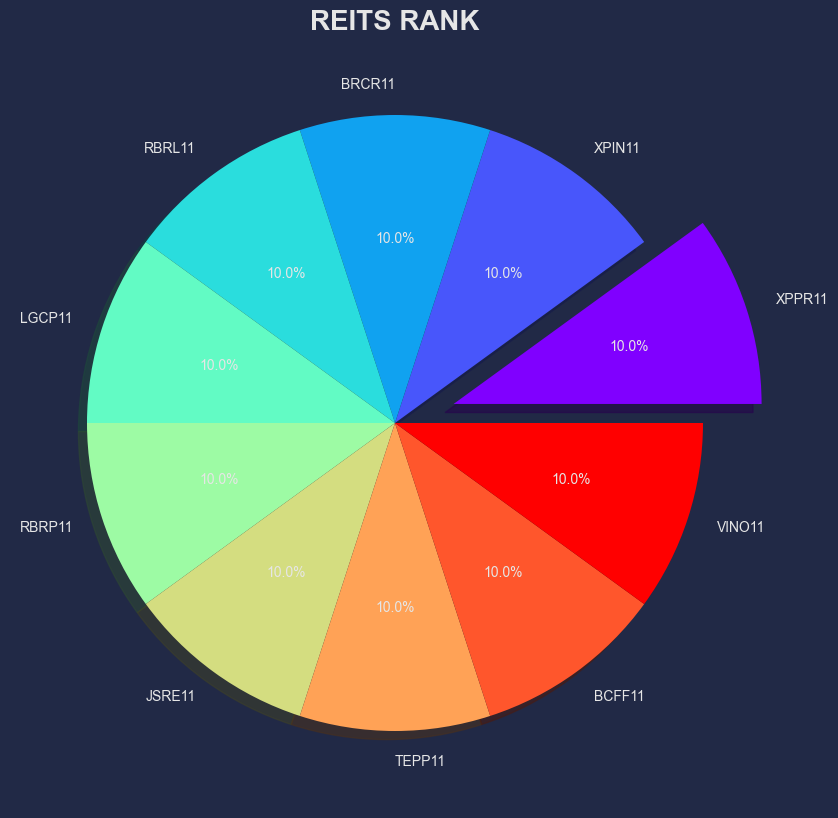

In [439]:
y = [10,10,10,10,10,10,10,10,10,10]
ml = test['ticker']
me = [0.2,0,0,0,0,0,0,0,0,0]
colors = plt.cm.rainbow(np.linspace(0, 1, len(y)))
plt.style.use("cyberpunk")
plt.pie(y, labels = ml, shadow=True, autopct='%1.1f%%', explode=me, colors=colors)
plt.title('REITS RANK',fontname="Arial",fontweight="bold", size=20)
#plt.legend()

In [440]:
tts = test['ticker']+".SA"
print(tts)

0    XPPR11.SA
1    XPIN11.SA
2    BRCR11.SA
3    RBRL11.SA
4    LGCP11.SA
5    RBRP11.SA
6    JSRE11.SA
7    TEPP11.SA
8    BCFF11.SA
9    VINO11.SA
Name: ticker, dtype: object


In [441]:
x = np.random.rand(10,1)
#x = x.T
x = pd.DataFrame(x, columns=[f'name{0}'])


for i in range (0,10):
    y = np.random.rand(10,1)
    #y = y.T
    y = pd.DataFrame(y, columns=[f'name{i+1}'])
    x = pd.concat([x,y], axis=1, join='inner', ignore_index=False, copy=False)

x


,name0,name1,name2,name3,name4,name5,name6,name7,name8,name9,name10
0,0.672516,0.310581,0.202980,0.289637,0.855626,0.160170,0.079611,0.386343,0.728321,0.472253,0.492709
1,0.325246,0.238869,0.013659,0.649432,0.990262,0.455946,0.828513,0.774363,0.460722,0.780860,0.665758
2,0.402858,0.225920,0.816765,0.649768,0.028292,0.480435,0.918404,0.842792,0.326957,0.249195,0.081695
3,0.487652,0.742852,0.427675,0.369003,0.530132,0.255414,0.644125,0.353998,0.238083,0.540334,0.755046
4,0.807769,0.916295,0.924206,0.046763,0.948320,0.498242,0.507816,0.690588,0.993562,0.290308,0.123089
5,0.084033,0.273844,0.277440,0.303045,0.236729,0.125213,0.320915,0.356655,0.821917,0.033229,0.917215
6,0.285336,0.763620,0.292648,0.845941,0.602612,0.207185,0.029036,0.122937,0.782324,0.275992,0.372294
7,0.066014,0.621006,0.688404,0.950298,0.870461,0.011095,0.028942,0.564528,0.485119,0.211926,0.692164
8,0.560195,0.596584,0.546542,0.293777,0.224725,0.379189,0.054185,0.881748,0.499117,0.670058,0.722791
9,0.657633,0.316480,0.841871,0.715718,0.398600,0.963986,0.961525,0.651218,0.563915,0.061735,0.187275


In [442]:
ifix = "XFIX11.SA"
data = yf.download(ifix, period='1y')
dd = pd.DataFrame(data)
dd.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)
dd.rename(columns={'Adj Close': ifix}, inplace=True)

for x in range (10):
    data = yf.download(tts[x], period='1y')
    ddsad = pd.DataFrame(data)
    ddsad.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)
    ddsad.rename(columns={'Adj Close': tts[x]}, inplace=True)
    dd = pd.concat([dd, ddsad], axis=1, join='outer', ignore_index=False, copy=False)
dd
#dd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,XFIX11.SA,XPPR11.SA,XPIN11.SA,BRCR11.SA,RBRL11.SA,LGCP11.SA,RBRP11.SA,JSRE11.SA,TEPP11.SA,BCFF11.SA,VINO11.SA
Date,,,,,,,,,,,
2022-02-17,9.69,54.387699,76.255440,63.666359,76.468552,74.019691,60.900719,70.423073,66.404259,NaN,43.582314
2022-02-18,9.70,54.461189,76.663437,63.030048,78.022766,74.249580,60.687294,70.973030,65.180092,NaN,44.159931
2022-02-21,9.51,53.744705,75.793091,62.200108,78.464188,72.778206,60.678017,71.317924,65.385681,NaN,43.722061
2022-02-22,9.47,53.809010,75.502960,62.430645,78.160706,73.109276,60.483150,71.522980,64.619400,NaN,43.787273
2022-02-23,9.40,53.505886,75.457649,62.052570,77.461792,72.658669,61.568836,71.243355,65.320259,NaN,43.833855
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-13,9.79,30.790001,70.780182,54.169998,72.410004,76.629997,45.880001,61.980000,66.410004,NaN,40.919998
2023-02-14,9.79,30.930000,70.502731,54.320000,73.150002,76.230003,45.560001,61.580002,65.000000,NaN,41.000000
2023-02-15,9.78,31.090000,70.799995,54.099998,73.830002,76.230003,45.500000,61.669998,66.930000,NaN,41.369999


In [443]:
dd = dd.resample("M").last()
dd = dd.pct_change()
dd = dd.dropna(how='all')
dd.drop(['BCFF11.SA'], axis=1, inplace=True)
dd = dd*100
dd

,XFIX11.SA,XPPR11.SA,XPIN11.SA,BRCR11.SA,RBRL11.SA,LGCP11.SA,RBRP11.SA,JSRE11.SA,TEPP11.SA,VINO11.SA
Date,,,,,,,,,,
2022-03-31,1.562496,0.765044,-1.970809,-1.961084,1.798721,-0.645518,-2.380951,-5.224932,-0.671499,5.975858
2022-04-30,0.102566,-0.493026,-0.528153,4.007520,1.997558,1.720168,5.771357,6.692369,-0.774655,2.399505
2022-05-31,1.639343,-6.714878,-3.943572,-2.193291,-1.180195,-1.449640,-8.300199,1.052088,-2.072621,-3.715344
2022-06-30,0.604833,-6.402390,-4.417500,-7.980024,-0.498004,3.042915,-6.768766,-1.914361,0.617549,-9.272205
2022-07-31,-0.400801,-6.928305,-2.502223,-7.506015,2.445251,-0.788610,-10.292346,1.314049,6.035629,0.822103
2022-08-31,5.331999,8.584425,23.576726,24.846339,12.938703,10.093051,21.589615,15.123931,15.403970,15.179179
2022-09-30,-0.095513,-7.812818,-3.658913,-0.198790,-2.496632,-0.023643,-1.217695,1.071180,3.350803,-0.239419
2022-10-31,0.382409,-8.771922,2.100290,-3.978713,-1.822165,3.490992,-4.764040,-1.272040,-2.585086,1.772055
2022-11-30,-4.000001,-12.832940,-10.684561,-11.826091,-7.716608,-5.090450,-8.655912,-15.468132,-8.022043,-4.422321


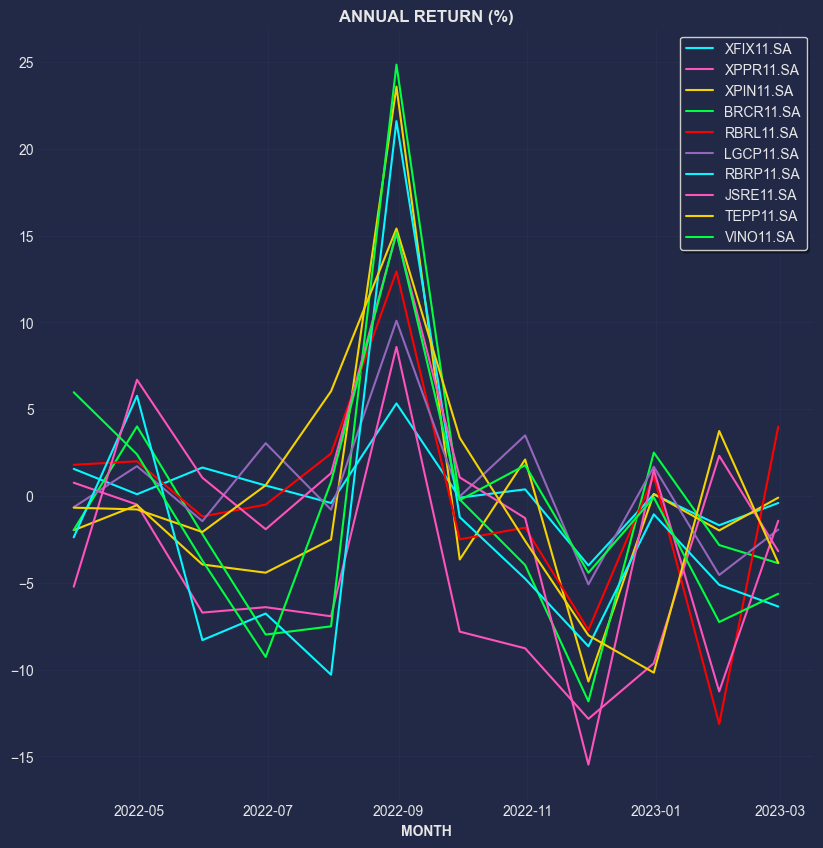

In [466]:
#sns.heatmap(dd,annot=True)
#dd.plot_monthly_heatmap()

plt.style.use("cyberpunk")
plt.plot(dd.index,dd)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.5)
plt.legend(dd.columns,loc='best', shadow=True, frameon=True)
#ax.set_label(y)
#ax.set_xticks(ind,labels=x)
#ax.bar_label(f, fmt='%.1f',padding=4, fontweight="bold")

plt.xlabel('MONTH', fontweight="bold")
plt.ylabel('VARIAÇÃO', fontweight="bold", visible=False)
plt.title('ANNUAL RETURN (%)', fontweight="bold")
plt.rcParams['figure.figsize'] = [10, 10]


<AxesSubplot: ylabel='Date'>

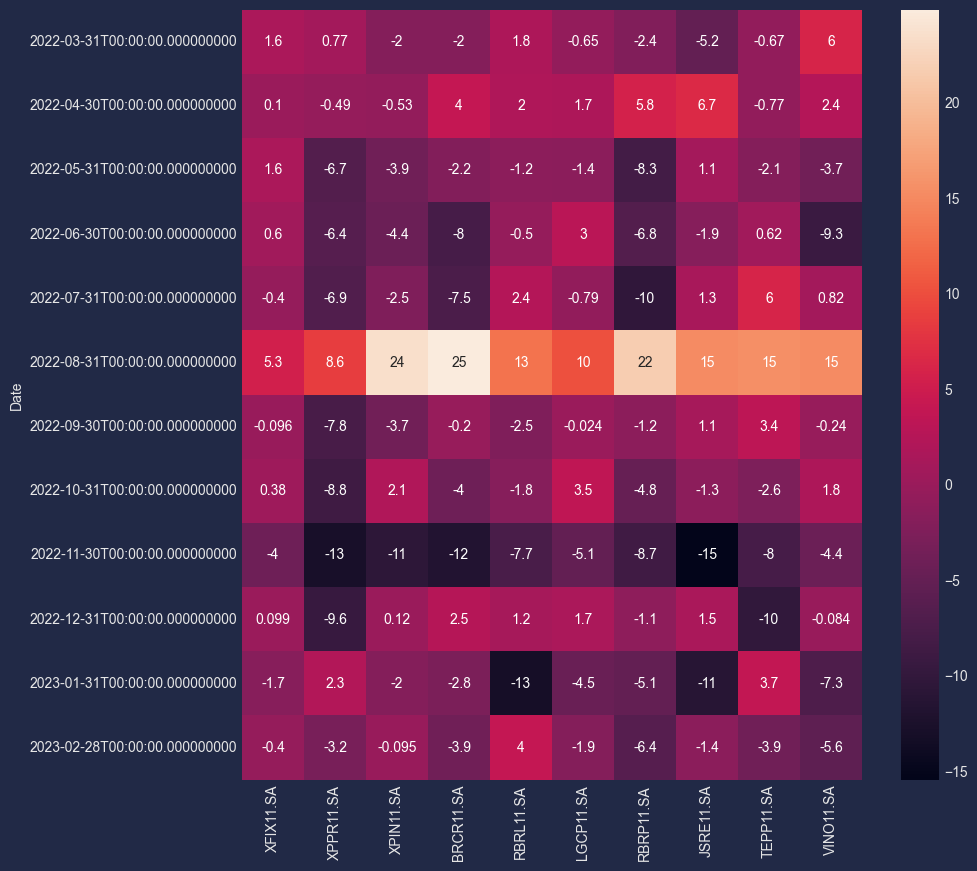

In [445]:
sns.heatmap(dd, annot=True)

Text(0.5, 1.0, 'ACUMULATED RETURN (%)')

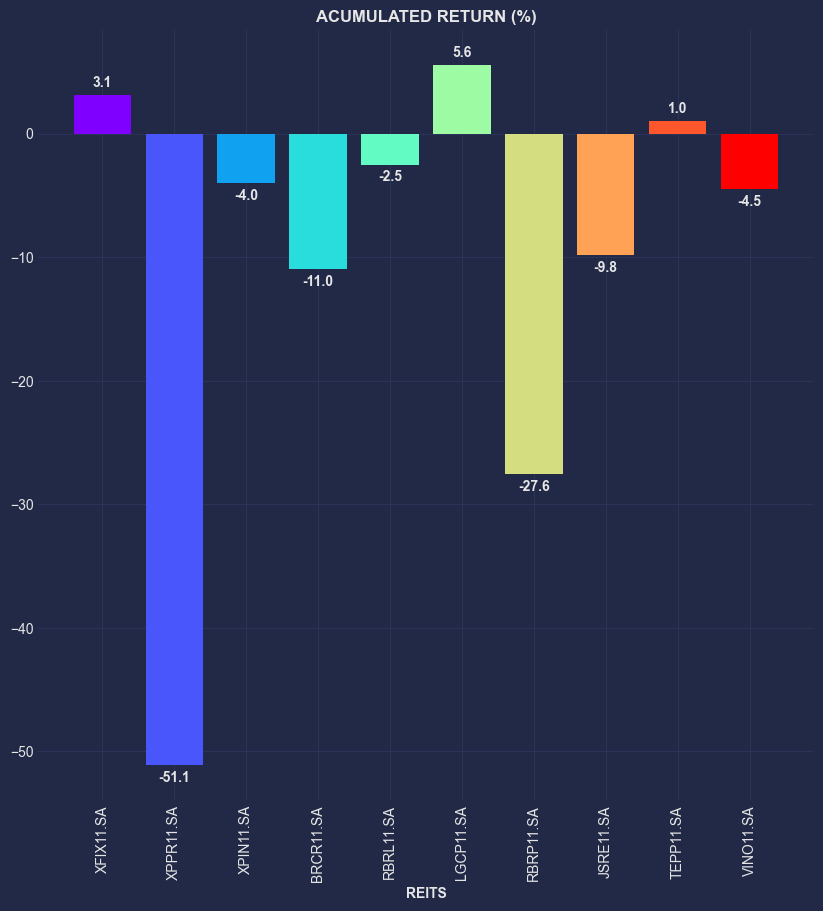

In [475]:
sumdd = dd.sum()
sumdd = pd.DataFrame(sumdd)
x = sumdd.index
y = sumdd[0]
colors = plt.cm.rainbow(np.linspace(0, 1, len(y)))

fig,ax = plt.subplots()
f = ax.bar(x,y,color=colors)
plt.xticks(x,rotation=90)
ax.set_label(y)
ax.bar_label(f,fmt='%.1f',padding=4, fontweight="bold")
plt.xlabel('REITS', fontweight="bold")
plt.ylabel('VARIATION', fontweight="bold", visible=False)
plt.title('ACUMULATED RETURN (%)', fontweight="bold")